# Detect place cells

In [2]:
from typing import Tuple

import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from param import *

output_dir = ParamDir().output_dir

## distribution of MI

### Representatives

#### kockout

Text(0.5, 0, 'MI (bits)')

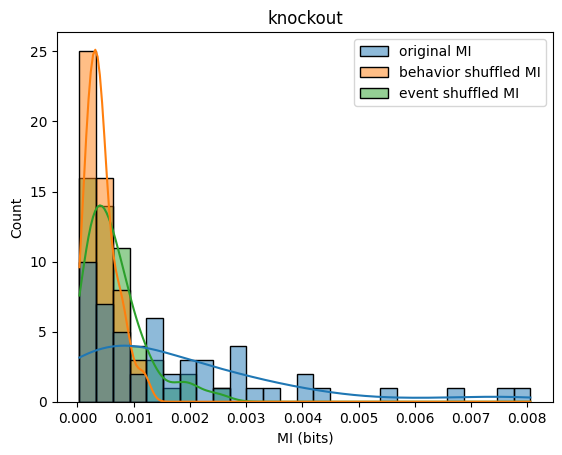

In [7]:
data_dir = ParamDir().data_list[0]
data_name = str(data_dir).split('/')[-1]
mouse_type = "knockout" if "KO" in data_name else "wild-type"
with open(output_dir/data_name/"MI_all.pickle","rb") as f:
    results_all = pickle.load(f)
fig, ax = plt.subplots()
plot_data = {
    'original MI' : results_all['original MI'], 
    'behavior shuffled MI': results_all['behavior shuffled MI all'][0], 
    'event shuffled MI': results_all['event shuffled MI all'][0]}
sns.histplot(plot_data, ax=ax, kde=True)
plt.title(f"{mouse_type}")
plt.xlabel("MI (bits)")

#### wild-type

Text(0.5, 0, 'MI (bits)')

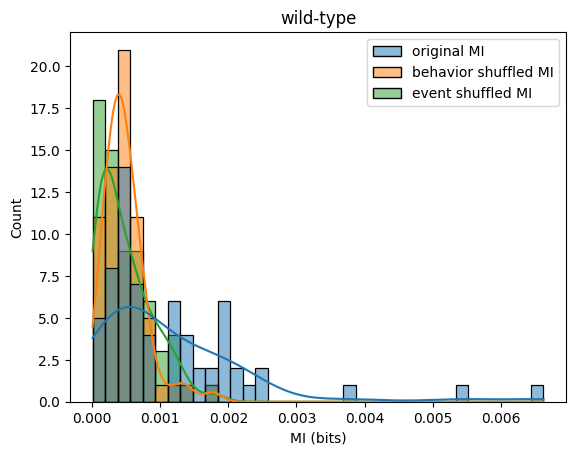

In [26]:
data_dir = ParamDir().data_list[2]
data_name = str(data_dir).split('/')[-1]
mouse_type = "knockout" if "KO" in data_name else "wild-type"
with open(output_dir/data_name/"MI_all.pickle","rb") as f:
    results_all = pickle.load(f)
fig, ax = plt.subplots()
plot_data = {
    'original MI' :results_all['original MI'], 
    'behavior shuffled MI': results_all['behavior shuffled MI all'][0], 
    'event shuffled MI': results_all['event shuffled MI all'][0]}
sns.histplot(plot_data, ax=ax, kde=True)
plt.title(f"{mouse_type}")
plt.xlabel("MI (bits)")

## Get place cells

In [3]:
def get_3sigma(results_all: list, neuron_id: int) -> Tuple:
    """Get the 3 sigma from the shuffled MI.
    
    Return
    ----------
    behavior_3sigma : float
        3sigma for behavior shuffled MI.
    event_3sigma : float
        3sigma for event shuffled MI.
    """
    beh_std_3 = np.array(results_all['behavior shuffled MI all'])[:,neuron_id].std()*3
    event_std_3 = np.array(results_all['event shuffled MI all'])[:,neuron_id].std()*3

    beh_mu = np.array(results_all['behavior shuffled MI all'])[:,neuron_id].mean()
    event_mu = np.array(results_all['event shuffled MI all'])[:,neuron_id].mean()

    behavior_3sigma = beh_mu + beh_std_3
    event_3sigma = event_mu + event_std_3
    return behavior_3sigma, event_3sigma

def get_pc_ratio(results_all:list) -> Tuple:
    """Get place cells ratio based on two shuffle methods.

    Return
    ----------
    pc_beh_id : list
        place cell ratio from behavior shuffling method.
    pc_event_id : list
        place cell ratio from event shuffling method.
    """
    pc_beh_id, pc_event_id = [], []
    for neuron_id in range(len(results_all['original MI'])):
        behavior_3sigma, event_3sigma = get_3sigma(results_all, neuron_id)
        if results_all['original MI'][neuron_id] > behavior_3sigma:
            pc_beh_id.append(neuron_id)
        if results_all['original MI'][neuron_id] > event_3sigma:
            pc_event_id.append(neuron_id)
    return (pc_beh_id, pc_event_id)

### kockout

In [53]:
data_dir = ParamDir().data_list[1]
data_name = str(data_dir).split('/')[-1]
mouse_type = "knockout" if "KO" in data_name else "wild-type"
print(mouse_type)
with open(output_dir/data_name/"MI_all.pickle","rb") as f:
    results_all = pickle.load(f)

pc_beh_id, pc_event_id = get_pc_ratio(results_all)
print(f"behavior shuffled method PC ratio: {len(pc_beh_id)/len(results_all['original MI']) :.2f}")
print(f"event shuffled method PC ratio: {len(pc_event_id)/len(results_all['original MI']) :.2f}")

knockout
behavior shuffled method PC ratio: 0.17
event shuffled method PC ratio: 0.12


### wild-type

In [54]:
data_dir = ParamDir().data_list[2]
data_name = str(data_dir).split('/')[-1]
mouse_type = "knockout" if "KO" in data_name else "wild-type"
print(mouse_type)
with open(output_dir/data_name/"MI_all.pickle","rb") as f:
    results_all = pickle.load(f)

pc_beh_id, pc_event_id = get_pc_ratio(results_all)
print(f"behavior shuffled method PC ratio: {len(pc_beh_id)/len(results_all['original MI']) :.2f}")
print(f"event shuffled method PC ratio: {len(pc_event_id)/len(results_all['original MI']) :.2f}")

wild-type
behavior shuffled method PC ratio: 0.32
event shuffled method PC ratio: 0.26


## All mice place cell ratio boxplot

In [5]:
ratio_list = []
for data_dir in ParamDir().data_list:
    data_name = str(data_dir).split('/')[-1]
    mouse_type = "knockout" if "KO" in data_name else "wild-type"

    with open(output_dir/data_name/"MI_all.pickle","rb") as f:
        results_all = pickle.load(f)

    pc_beh_id, pc_event_id = get_pc_ratio(results_all)
    num_neuron = len(results_all['original MI'])
    ratio_list.append(
        [
            len(pc_beh_id)/num_neuron, # pc ration for behavior shuffle
            len(pc_event_id)/num_neuron, # pc ratio for event shuffle
            mouse_type
            ])

<AxesSubplot:xlabel='shuffle method', ylabel='place cell ratio'>

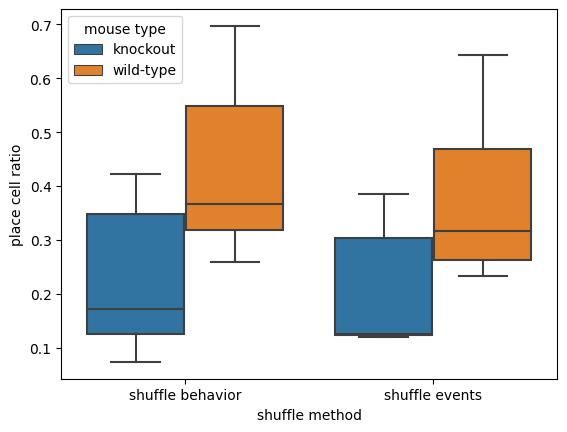

In [16]:
df = pd.DataFrame(ratio_list, columns=["behavior pc ratio", "event pc ratio", "mouse type"])
df1 = df[["behavior pc ratio", "mouse type"]]
df1["pc_ratio"] = ["shuffle behavior"] * len(df1)
df2 = df[["event pc ratio", "mouse type"]]
df2["pc_ratio"] = ["shuffle events"] * len(df2)
plot_data = pd.DataFrame(np.vstack([df1, df2]), columns = ["place cell ratio", "mouse type","shuffle method"])

fig, ax = plt.subplots()
sns.boxplot(plot_data, x = "shuffle method", y = "place cell ratio", hue="mouse type", ax=ax)
